# Library Import

In [28]:
# For data manipulation
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To find principal components using PCA
from sklearn.decomposition import PCA

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Suppress warnins
import warnings
warnings.filterwarnings('ignore')

# Data Understanding & Cleansing

In [4]:
country_df = pd.read_csv("Country-data.csv")

In [5]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Observation:
- The data set doesn't have null values in any of the columns
- Imputing data for missing values is not required
- Data type of all the columns(except feature variable country) are numeric(int64 and float64). Data type modification is not required for doing PCA and clustering

### Outlier Analysis

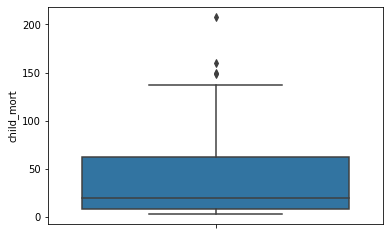

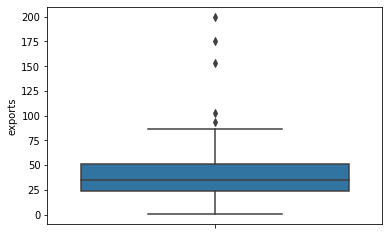

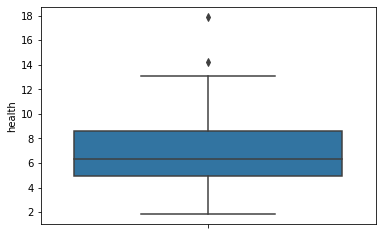

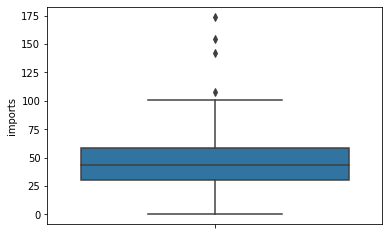

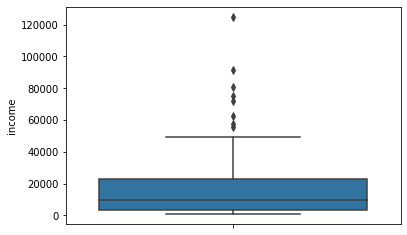

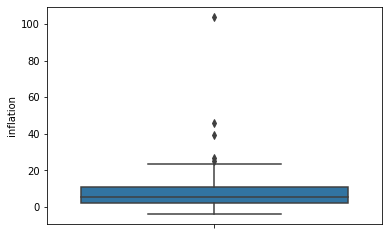

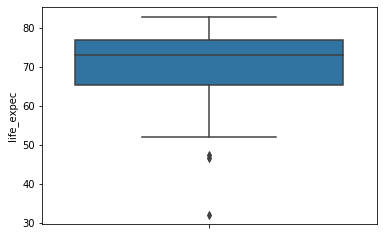

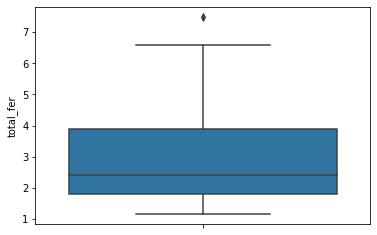

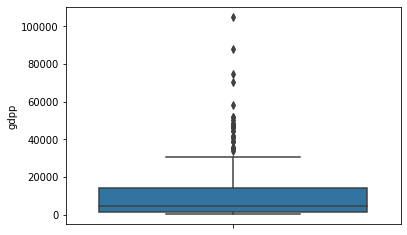

In [14]:
# Boxplot for each numeric column
for col in country_df.columns.drop('country'):
    sns.boxplot(y=col, data=country_df)
    plt.show()

### Observation:
- Statistically all the columns are having outliers
- Columns like child mortality, imports, inflation are having significant number of outliers on top. Also there are outliers on bottom on life expectency. These signifies that there are few countries which are far backward economically and socially
- Columns like exports, health, income, gdpp are having significant number of outliers on top signifying there are few countries which are far ahead economically and socially compared to others

### Actions on Outliers
- Since the objective of the NGO is to allocate money to countries who are dire need, we will not remove the outliers who are lagging behind economically and socially
- We will remove the outliers who are much ahead econimically and socially. Otherwise these countries will push away other countries from their cluster and we might get high number of countries in the cluster we are looking for

### Outlier removal

In [15]:
income_q3 = country_df.income.quantile(0.95)
gdpp_q3 = country_df.gdpp.quantile(0.95)
export_q3 = country_df.exports.quantile(0.95)

# Removing top 5% of countries who are high in income, gdpp and export
country_df = country_df[(country_df.child_mort <= income_q3) & (country_df.gdpp <= gdpp_q3) \
                       & (country_df.exports <= export_q3)]

In [16]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,40.650331,36.068205,6.769139,43.911695,13947.503311,8.112093,69.854305,3.028344,9574.860927
std,40.668084,17.965979,2.682415,18.329489,14660.909090,10.790368,8.796103,1.526702,12593.222926
min,2.600000,0.109000,1.970000,0.065900,609.000000,-1.900000,32.100000,1.230000,231.000000
25%,10.450000,22.800000,4.975000,29.950000,3005.000000,1.960000,64.300000,1.850000,1300.000000
50%,21.500000,32.600000,6.210000,42.900000,9470.000000,5.470000,71.600000,2.580000,4340.000000
75%,62.400000,49.500000,8.325000,57.200000,18500.000000,11.150000,76.400000,4.160000,11600.000000
max,208.000000,77.700000,17.900000,101.000000,80600.000000,104.000000,82.800000,7.490000,48400.000000


# Data Preparation

In [19]:
# Creating custom surrogate key as 'ID' for easy indentification of rows in future
country_df['ID'] = country_df.index+101

In [20]:
# New dataframe without Country column to be used in modelling
country_ndf = country_df.drop(['country'], axis=1)

In [23]:
# A snippet of current data
country_ndf.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,101
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,102
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,103
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,104
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,105


In [24]:
# Current shape of the dataframe
country_ndf.shape

(151, 10)

In [26]:
# Creating new dataframe with only the relevant features to be used directly in modelling
country_data = country_ndf.drop(["ID"], axis=1)

### Feature Scaling

In [27]:
# Scaling of numerical columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_scaled = standard_scaler.fit_transform(country_data)

### Finding Principal Components using PCA

In [29]:
# Initialization of PCA class with SVD solver as Randomized and Random State as 42
pca = PCA(svd_solver='randomized', random_state=42)

In [30]:
# Fitting the scaled data with PCA
pca.fit(country_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [31]:
# Principal components with SVD solver methods for the scaled country data
pca.components_

array([[ 0.4401754 , -0.23267052, -0.14891272, -0.03022343, -0.41358704,
         0.16309205, -0.4386523 ,  0.4193482 , -0.4038559 ],
       [ 0.02103623, -0.48561563, -0.00188733, -0.75336881,  0.18468905,
         0.30620237,  0.11551712,  0.05651331,  0.22750587],
       [-0.07523967,  0.43878433, -0.72171782, -0.08706064,  0.11706865,
         0.48447415,  0.0804586 , -0.05042137, -0.12615454],
       [ 0.35684598,  0.32929837,  0.29538768,  0.14553726,  0.41356012,
         0.31723572, -0.26101145,  0.35485622,  0.43596809],
       [-0.22785112, -0.07845015,  0.46042933,  0.22782085, -0.24106421,
         0.72328112,  0.15904752, -0.17324702, -0.20365106],
       [ 0.1905065 , -0.08588091, -0.0162151 , -0.02392511,  0.14078368,
         0.06665503, -0.59594502, -0.75897054,  0.00683485],
       [-0.01781262, -0.61984636, -0.37440019,  0.5893105 ,  0.20475163,
         0.1183345 ,  0.06570213,  0.05416536,  0.25462501],
       [-0.69450086, -0.06216657,  0.04616515, -0.03470487,  0

In [32]:
# Checking spread(variance) of the principal components in explaing the original dataset
pca.explained_variance_ratio_

array([0.44934145, 0.16906037, 0.14038783, 0.09904339, 0.07635468,
       0.02694317, 0.02183527, 0.01020611, 0.00682773])

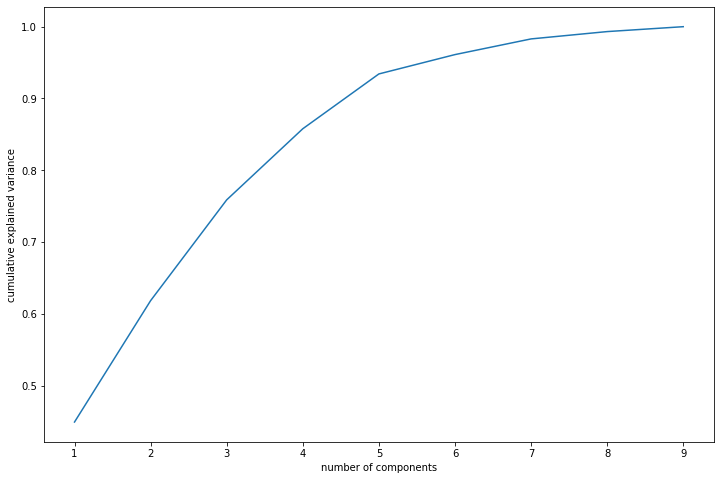

In [33]:
# Checking spread(variance) of the principal components using Scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Observation:
- Scree plot suggests that the first 5 principal components alone can explain around 95% of the data
- We can continue with 5 principal components for doing rest of the analysis

In [35]:
# Applying incremental PCA method with 5 principal components
from sklearn.decomposition import IncrementalPCA
pca_inc = IncrementalPCA(n_components=5)

In [37]:
# Fitting and Transforming the scaled country dataset as per the basis
# represented by the first 5 principal components
df_pca = pca_inc.fit_transform(country_data_scaled)
df_pca.shape

(151, 5)

In [38]:
# Renaming the transformed dataframe's columns with the column names 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
df_pca = pd.DataFrame(df_pca,\
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [39]:
# A snippet of the Transformed dataset
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,2.941911,-0.345803,1.118320,0.487392,-0.139420
1,-0.619042,0.205589,0.154123,-1.290250,0.302967
2,-0.065245,-0.638844,-1.323306,-0.654143,0.269182
3,2.720392,0.461157,-2.006454,1.783177,-0.418105
4,-1.362192,0.908338,-0.216954,-0.426649,-0.180738


In [40]:
# Creating a new dataframe as df_final copying the dataset from the transformed dataframe
df_final = df_pca.copy()

In [41]:
# Applying surrogate key 'ID' as the Index of the df_final dataframe
df_final.index = country_ndf['ID']

In [42]:
# Reseting Index column to take 'ID' as a column of the new dataframe
df_final.reset_index(inplace=True)

# Looking shape of the new dataframe
df_final.shape

(151, 6)

In [43]:
# A data snippet of the new dataframe
df_final.head()

,ID,PC1,PC2,PC3,PC4,PC5
0,101,2.941911,-0.345803,1.118320,0.487392,-0.139420
1,102,-0.619042,0.205589,0.154123,-1.290250,0.302967
2,103,-0.065245,-0.638844,-1.323306,-0.654143,0.269182
3,104,2.720392,0.461157,-2.006454,1.783177,-0.418105
4,105,-1.362192,0.908338,-0.216954,-0.426649,-0.180738


### Plotting the principal components pairwise

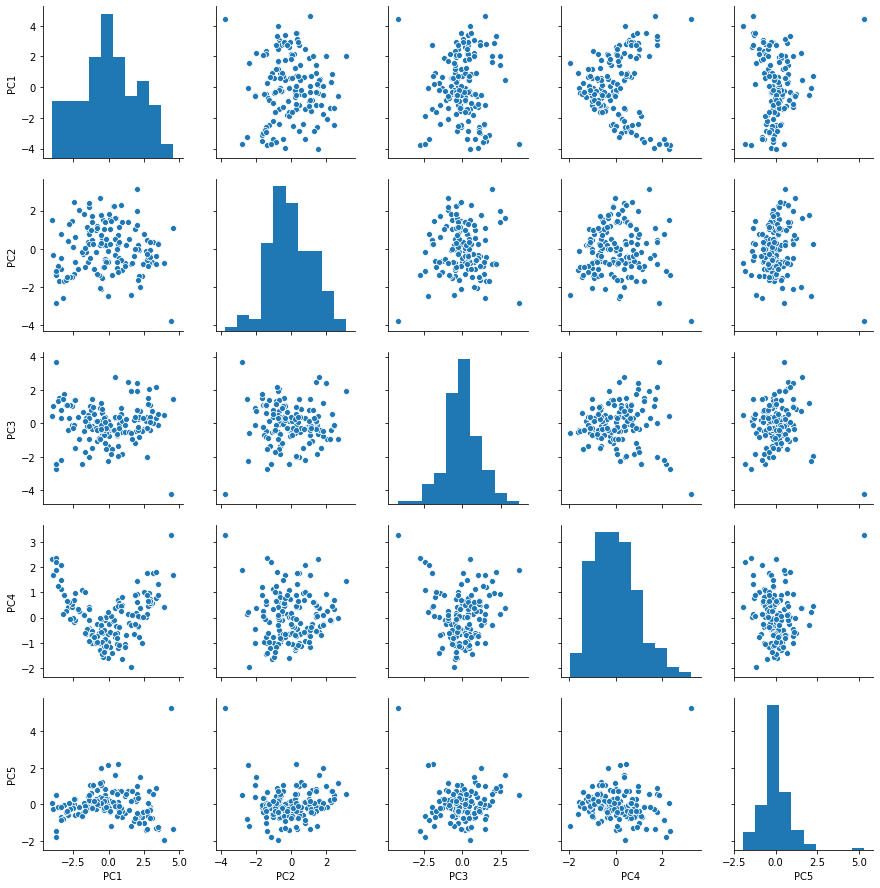

In [44]:
# Pair-wise scatter plot to confirm there is no linear depedency among the PC's
sns.pairplot(data=df_pca)

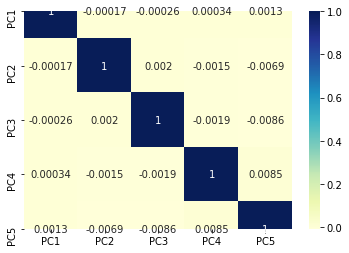

In [45]:
# Confirming there is no linear depedency among the PC's using correlation coefficients and heatmap
sns.heatmap(df_pca.corr(), annot=True, cmap="YlGnBu")

# Building Model

### Defining Hopkins function

In [46]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
# Checking Hopkins statistic for the PCA transformed data
hopkins(df_pca)

0.7417182125316628

### Observation:
- We are getting 

For n_clusters = 2, silhouette score is 0.30131428372202196
For n_clusters = 3, silhouette score is 0.31518436070815914
For n_clusters = 4, silhouette score is 0.32329052420165705
For n_clusters = 5, silhouette score is 0.24989794645212446
For n_clusters = 6, silhouette score is 0.26062676036569304
For n_clusters = 7, silhouette score is 0.25932313665921386
For n_clusters = 8, silhouette score is 0.23534951529147122
For n_clusters = 9, silhouette score is 0.24614536391932867


Text(0.5, 1.0, 'Silhouette Score')

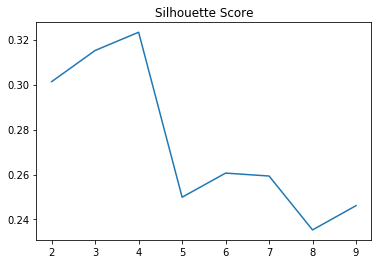

In [110]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []

for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_pca)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df_pca, preds, metric='euclidean')
    sse_.append([n_clusters, score])
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette Score")

Text(0.5, 1.0, 'Elbow Curve')

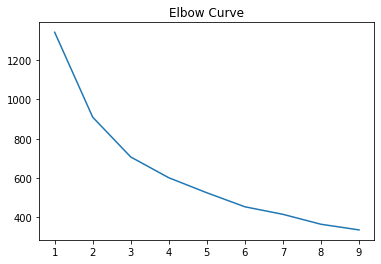

In [111]:
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append([num_clusters, model_clus.inertia_])

plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])
plt.title("Elbow Curve")

In [112]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [113]:
df_final['KMeans-CID'] = model_clus2.labels_

In [143]:
df_final['KMeans-CID'].value_counts()

1    83
2    45
0    30
Name: KMeans-CID, dtype: int64

In [114]:
df_final.head()

,ID,PC1,PC2,PC3,PC4,PC5,KMeans-CID
0,101,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2
1,102,0.571663,-0.365855,-0.285368,-1.233879,0.278467,1
2,103,-0.082299,-0.334262,1.307774,-0.813505,0.215401,1
3,104,-2.830780,1.451765,1.559083,1.124602,-0.375038,2
4,105,1.295018,0.323543,-0.154906,-0.664375,-0.173215,1


In [116]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,101
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,102
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,103
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,104
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,105


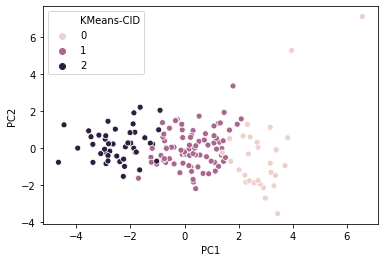

In [73]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='PC1', y='PC2',hue='KMeans-CID',\
                legend='full',data=df_final)

In [118]:
country_data_k = pd.merge(country_df, df_final, how='inner', on='ID')

In [119]:
country_data_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,PC4,PC5,KMeans-CID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,101,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,102,0.571663,-0.365855,-0.285368,-1.233879,0.278467,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,103,-0.082299,-0.334262,1.307774,-0.813505,0.215401,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,104,-2.830780,1.451765,1.559083,1.124602,-0.375038,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,105,1.295018,0.323543,-0.154906,-0.664375,-0.173215,1


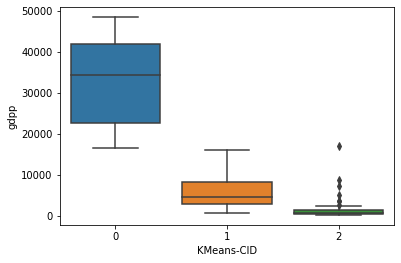

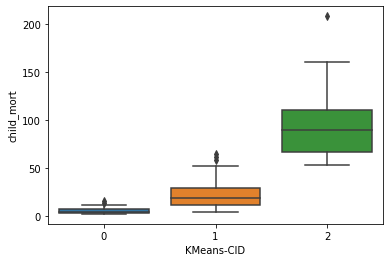

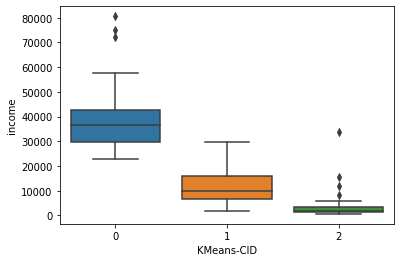

In [124]:
sns.boxplot(x='KMeans-CID', y='gdpp', data=country_data_k)
plt.show()
sns.boxplot(x='KMeans-CID', y='child_mort', data=country_data_k)
plt.show()
sns.boxplot(x='KMeans-CID', y='income', data=country_data_k)
plt.show()

In [156]:
country_data_k['KMeans-CID'].value_counts()

1    83
2    45
0    30
Name: KMeans-CID, dtype: int64

In [167]:
country_data_k[country_data_k['KMeans-CID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,PC4,PC5,KMeans-CID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,101,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,104,-2.830780,1.451765,1.559083,1.124602,-0.375038,2
16,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,118,-2.643422,0.230150,-0.226516,0.091846,-1.396991,2
24,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,126,-3.099102,-0.290056,-0.491169,0.850986,-0.736922,2
25,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,127,-2.903194,-0.828949,-1.493819,1.539146,0.719808,2
27,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,129,-2.764882,-0.159788,-0.328508,0.322441,-1.323717,2
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,132,-3.951514,0.005782,-0.334727,0.676747,-1.924819,2
31,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,133,-3.547010,0.936191,-0.110397,1.169581,-1.282018,2
35,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,137,-2.065563,0.247072,-0.319221,-0.274977,-0.731915,2
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,138,-3.169077,0.704022,-0.086003,1.627573,0.593432,2


# Hierarchical Clustering

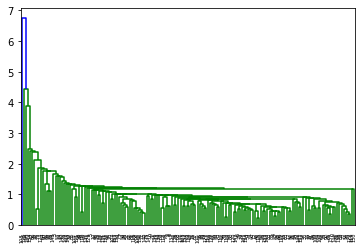

In [127]:
# single linkage
mergings = linkage(df_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

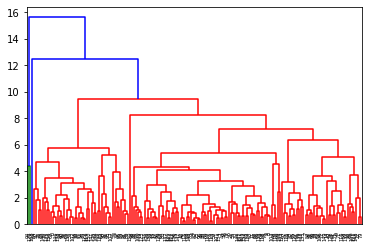

In [128]:
# complete linkage
mergings = linkage(df_pca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [150]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0])

In [151]:
df_final['H-CID'] = cluster_labels

In [152]:
country_data_h = pd.merge(country_df, df_final, how='inner', on='ID')

In [157]:
country_data_h['H-CID'].value_counts()

1    110
0     45
2      2
3      1
Name: H-CID, dtype: int64

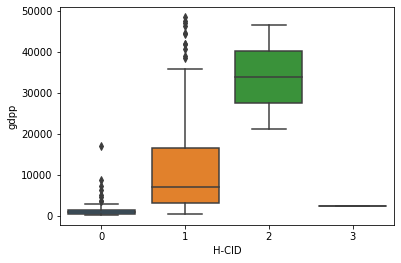

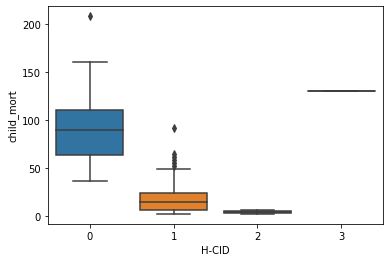

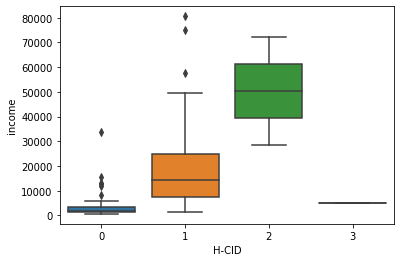

In [153]:
sns.boxplot(x='H-CID', y='gdpp', data=country_data_h)
plt.show()
sns.boxplot(x='H-CID', y='child_mort', data=country_data_h)
plt.show()
sns.boxplot(x='H-CID', y='income', data=country_data_h)
plt.show()

In [166]:
country_data_h[(country_data_h["H-CID"] == 0)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,PC4,PC5,KMeans-CID,H-CID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,101,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,104,-2.830780,1.451765,1.559083,1.124602,-0.375038,2,0
16,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,118,-2.643422,0.230150,-0.226516,0.091846,-1.396991,2,0
20,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,122,-0.738981,0.397251,-0.608791,0.534370,0.197710,1,0
24,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,126,-3.099102,-0.290056,-0.491169,0.850986,-0.736922,2,0
25,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,127,-2.903194,-0.828949,-1.493819,1.539146,0.719808,2,0
27,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,129,-2.764882,-0.159788,-0.328508,0.322441,-1.323717,2,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,132,-3.951514,0.005782,-0.334727,0.676747,-1.924819,2,0
31,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,133,-3.547010,0.936191,-0.110397,1.169581,-1.282018,2,0
35,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,137,-2.065563,0.247072,-0.319221,-0.274977,-0.731915,2,0
